# Data Challenge : EEG

In [10]:
from tools import *

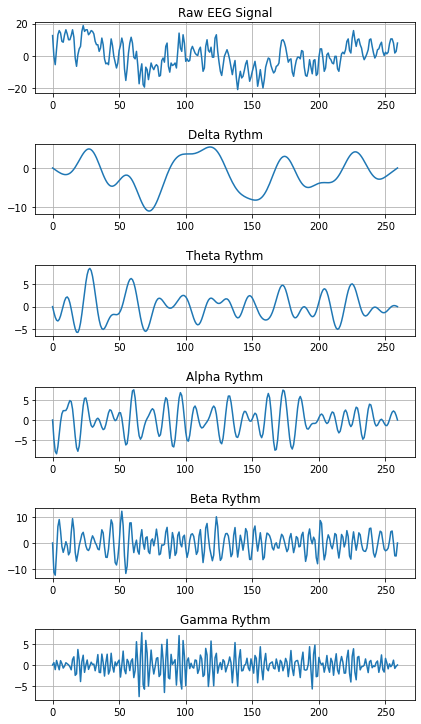

In [11]:
sig = np.load('sig.npy')

info = ['Raw EEG Signal', 'Delta Rythm', 'Theta Rythm', 'Alpha Rythm',
        'Beta Rythm', 'Gamma Rythm']

fig, ax = plt.subplots(6, figsize=(6,10))
fig.tight_layout(h_pad=3)
for i in range(6):
  ax[i].plot(sig[i])
  ax[i].set_title(info[i])
  ax[i].grid()

In [15]:
# upload the datsets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print('The dimension of the training set is ', X_train.shape)
print('The dimension of the training labels is ', y_train.shape)

X_test = np.load('X_test.npy')
print('The dimension of the testing set is ', X_test.shape)

The dimension of the training set is  (2136, 64, 3)
The dimension of the training labels is  (2136,)
The dimension of the testing set is  (533, 64, 3)


In [39]:
set(y_train)

{1, 2, 3, 4}

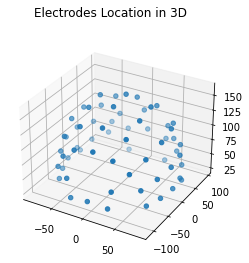

In [13]:
# Display of 3D position of each electrodes
channel_information = np.load('ChanInfo.npy', allow_pickle=True).all()
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(channel_information['position'][:, 0], channel_information['position'][:, 1], channel_information['position'][:, 2])
plt.suptitle("Electrodes Location in 3D")
plt.show()

  0%|                                      | 7/2136 [00:00<00:30, 69.33it/s]

Image Creation


100%|█████████████████████████████████████| 533/533 [00:07<00:00, 69.99it/s]


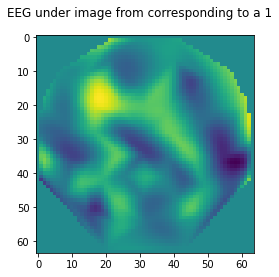

In [37]:
# Image Creation
print('Image Creation')
Electrodes_position = channel_information['position']
X_image_train = band_image(X_train, Electrodes_position, 64)
X_image_test = band_image(X_test, Electrodes_position, 64)

#command specific to keras (need to have n_channels x Height x Width as shape)
#implementation made with pytorch wich is a clearly better lib ;)
X_image_train = X_image_train.swapaxes(1,-1)
X_image_test = X_image_test.swapaxes(1,-1)

plt.imshow(X_image_train[584, :, :, 0])
plt.suptitle('EEG under image from corresponding to a '+str(y_train[584]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


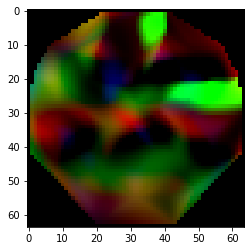

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


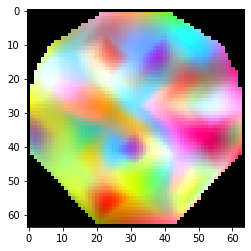

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


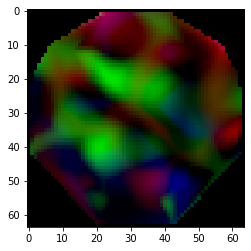

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


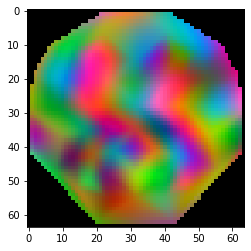

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


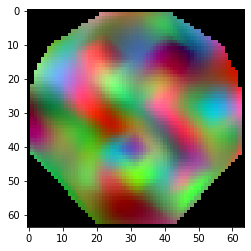

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


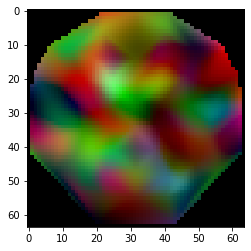

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


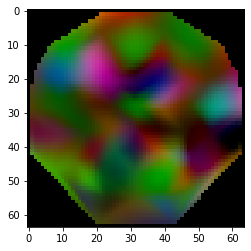

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


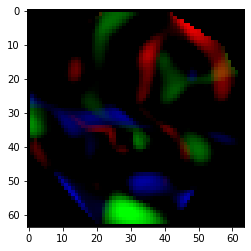

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


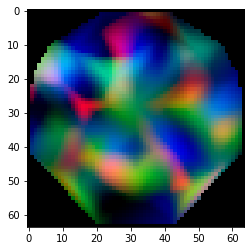

4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


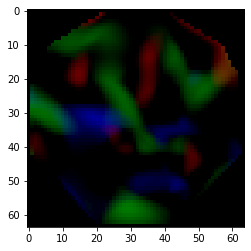

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


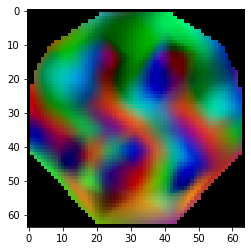

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


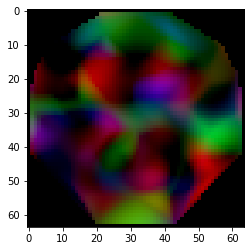

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


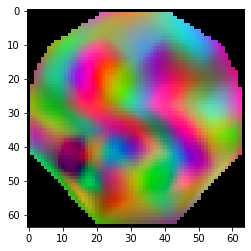

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


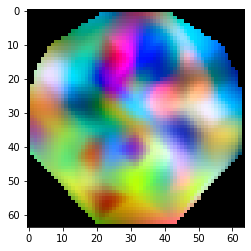

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


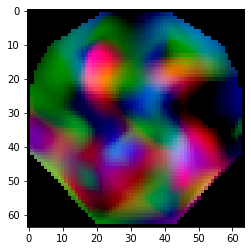

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


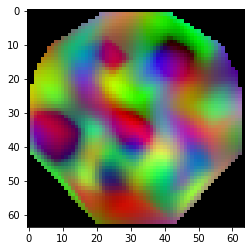

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


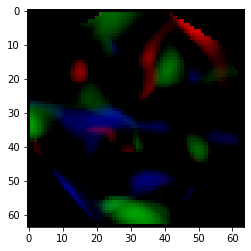

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


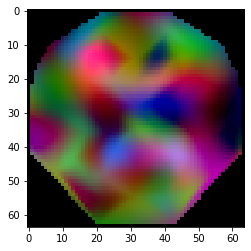

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


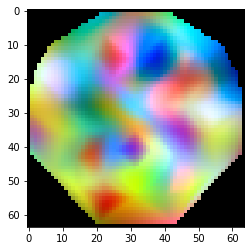

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


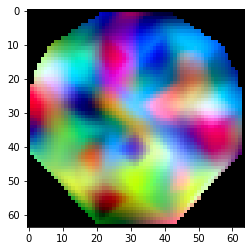

2


In [49]:
for i in range(20):
    plt.imshow(X_image_train[i, :, :, :])
    plt.show()
    print(y_train[i])

In [60]:
mean_images = np.zeros(4)
for i in range(1,5):
    mean_images[i-1] = np.mean(X_image_train[np.where(y_train==i)])

In [57]:
mean_images[0]
#plt.imshow(mean_images[0])
#plt.show()

-0.4251680532971935

In [42]:
sig[0]

(260,)